In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [69]:
#Load the training and test MNIST digits data sets from mnist_train.csv and mnist_test.csv,
train=pd.read_csv('/Users/Supriya/Desktop/mnist_train.csv',header=None)
test=pd.read_csv('/Users/Supriya/Desktop/mnist_test.csv',header=None)

In [70]:
train.shape,test.shape

((60000, 785), (10000, 785))

In [28]:
Y_train=train.iloc[:,0]
Y_test=test.iloc[:,0]
Y_train.shape,Y_test.shape

((60000,), (10000,))

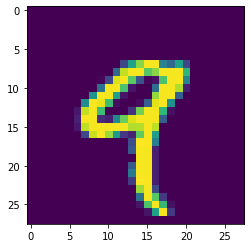

In [29]:
def gen_image(arr):
    two_d = np.reshape(arr, (28, 28)) 
    plt.imshow(two_d , interpolation='nearest')
    return plt
gen_image(train.iloc[4,1:].values).show()

In [30]:
#Scaling Train and Test Data
sc = MinMaxScaler()
X_train =  pd.DataFrame(sc.fit_transform(train.iloc[:,1:]))
X_test=pd.DataFrame(sc.fit_transform(test.iloc[:,1:]))
X_train.shape,X_test.shape

((60000, 784), (10000, 784))

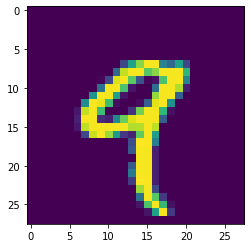

In [31]:
gen_image(X_train.iloc[4,:].values).show()

In [66]:
#Fitting TruncatedSVD to X_train
svd=TruncatedSVD(n_components=88, random_state=0)
svd.fit(X_train)
PoV=svd.explained_variance_ratio_
print("Total Variance explained by %d components = %0.2f"%(PoV.shape[0],PoV.sum()*100),'%')

Total Variance explained by 88 components = 90.11 %


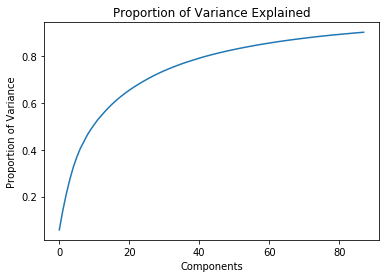

In [65]:
#Proportion of variance explained for Train data
plt.plot(np.cumsum(PoV))
plt.xlabel("Components")
plt.ylabel("Proportion of Variance")
plt.title('Proportion of Variance Explained')
plt.show()

In [53]:
X_test_SVD=pd.DataFrame(svd.transform(X_test))

In [54]:
X_test_SVDPlot=X_test_SVD.copy()
X_test_SVDPlot['Label']=Y_test

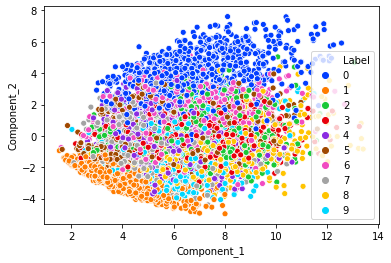

In [55]:
#scatterplot of the data, coloring each image according to its class
sns.scatterplot(X_test_SVDPlot.iloc[:,0],X_test_SVDPlot.iloc[:,1],
                hue=X_test_SVDPlot['Label'],legend='full',palette=sns.color_palette("bright"))
plt.xlabel('Component_1')
plt.ylabel('Component_2')
plt.show()

In [56]:
from sklearn.model_selection import train_test_split
trainX,testX,trainY,testY= train_test_split(X_test_SVD,Y_test, test_size=0.3,random_state=0)#SVD reduced Test data
train_X,test_X,train_Y,test_Y= train_test_split(X_test,Y_test, test_size=0.3,random_state=0)#Original scaled Test data

In [57]:
trainX.shape,testX.shape,trainY.shape,testY.shape

((7000, 88), (3000, 88), (7000,), (3000,))

In [58]:
#Naive Bayes_SVD_data
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
gnb = GaussianNB()
gnb.fit(trainX, trainY)
y_pred_testNB = gnb.predict(testX)
y_pred_trainNB = gnb.predict(trainX)
print('NaiveBayes_Train_Accuracy:',round(metrics.accuracy_score(trainY, y_pred_trainNB),2),
      "\nNaiveBayes_Test_Accuracy:",round(metrics.accuracy_score(testY, y_pred_testNB),2))

NaiveBayes_Train_Accuracy: 0.88 
NaiveBayes_Test_Accuracy: 0.88


In [59]:
#Naive Bayes_original_data
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
gnb = GaussianNB()
gnb.fit(train_X, train_Y)
y_pred_testNB = gnb.predict(test_X)
y_pred_trainNB = gnb.predict(train_X)
print("NaiveBayes_Train_Accuracy:",round(metrics.accuracy_score(train_Y, y_pred_trainNB),2),
      "\nNaiveBayes_Test_Accuracy:",round(metrics.accuracy_score(test_Y, y_pred_testNB),2))

NaiveBayes_Train_Accuracy: 0.57 
NaiveBayes_Test_Accuracy: 0.55


In [60]:
#KNN_SVD_data
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=28)
knn.fit(trainX, trainY)
y_pred_testKNN = knn.predict(testX)
y_pred_trainKNN = knn.predict(trainX)
print("\nKNN_Train_Accuracy:",round(metrics.accuracy_score(trainY, y_pred_trainKNN),2),
      "\nKNN_Test_Accuracy:",round(metrics.accuracy_score(testY, y_pred_testKNN),2) )


KNN_Train_Accuracy: 0.94 
KNN_Test_Accuracy: 0.93


In [61]:
#KNN_original_data
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=28)
knn.fit(train_X, train_Y)
y_pred_testKNN = knn.predict(test_X)
y_pred_trainKNN = knn.predict(train_X)
print("KNN_Train_Accuracy:",round(metrics.accuracy_score(train_Y, y_pred_trainKNN),2),
      "\nKNN_Test_Accuracy:",round(metrics.accuracy_score(test_Y, y_pred_testKNN),2))

KNN_Train_Accuracy: 0.93 
KNN_Test_Accuracy: 0.92


In [67]:
#Multinomial Logistic Regression (MLR) SVD Data
from sklearn.linear_model import LogisticRegression
MLP=LogisticRegression(solver='sag',multi_class='multinomial',max_iter=3000)
MLP.fit(trainX, trainY)
y_pred_testMLP = MLP.predict(testX)
y_pred_trainMLP = MLP.predict(trainX)
print("MLR_train_Accuracy:",round(metrics.accuracy_score(trainY, y_pred_trainMLP),2),
      "\nMLR_test_Accuracy:",round(metrics.accuracy_score(testY, y_pred_testMLP),2))

MLR_train_Accuracy: 0.94 
MLR_test_Accuracy: 0.91


In [68]:
#Multinomial Logistic Regression (MLR) Original Data
from sklearn.linear_model import LogisticRegression
MLP=LogisticRegression(solver='sag',multi_class='multinomial',max_iter=3000)
MLP.fit(train_X, train_Y)
y_pred_testMLP = MLP.predict(test_X)
y_pred_trainMLP = MLP.predict(train_X)
print("MLR_train_Accuracy:",round(metrics.accuracy_score(train_Y, y_pred_trainMLP),2),
     "\nMLR_test_Accuracy:",round(metrics.accuracy_score(test_Y, y_pred_testMLP),2))

MLR_train_Accuracy: 0.98 
MLR_test_Accuracy: 0.9
